What was the impact of COVID on sales?

Was it different by COOPs? Document any 
systematic differences? 

Is there an impact of campaigns on Sales?

Provide recommendations to McDonald’s

In [50]:
import pathlib
import pandas as pd
#import plotnine as pn
from plotnine import *
from plotnine.data import *

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
mcd_path = pathlib.Path('Daily_Data_AppendMedia_new.csv')
mcd_df = pd.read_csv(mcd_path)

In [6]:
mcd_df.head(10)

,Unnamed: 0.1,Unnamed: 0,COOP Name,Date,All_Stores Counted,All_Guest Count,All_Total Sale Amount,Breakfast_Stores Counted,Breakfast_Guest Count,Breakfast_Total Sale Amount,...,Snapchat Video Views (SUM)_5,Snapchat Total Installs (SUM)_5,Pinterest Total MRC Video Views (SUM)_5,Pinterest Pin Clicks (SUM)_5,Pinterest Saves (SUM)_5,cpi,gas,gdp,income,unemploymentRate
0,0,0,ALBANY BUFFALO ROCHESTER SYRACUSE,2018-01-01,279,159812,1246572.17,279.0,26878.0,167706.86,...,NaN,NaN,NaN,NaN,NaN,251.948,2.436,56785.0,43967.0,4.0
1,1,1,ALBANY BUFFALO ROCHESTER SYRACUSE,2018-01-02,280,221014,1373883.30,280.0,57001.0,250084.70,...,NaN,NaN,NaN,NaN,NaN,251.948,2.436,56785.0,43967.0,4.0
2,2,2,ALBANY BUFFALO ROCHESTER SYRACUSE,2018-01-03,280,252152,1582091.86,280.0,64487.0,288306.91,...,NaN,NaN,NaN,NaN,NaN,251.948,2.436,56785.0,43967.0,4.0
3,3,3,ALBANY BUFFALO ROCHESTER SYRACUSE,2018-01-04,280,218358,1387330.31,280.0,65053.0,293077.92,...,NaN,NaN,NaN,NaN,NaN,251.948,2.436,56785.0,43967.0,4.0
4,4,4,ALBANY BUFFALO ROCHESTER SYRACUSE,2018-01-05,280,216261,1518814.20,279.0,53699.0,271734.59,...,NaN,NaN,NaN,NaN,NaN,251.948,2.436,56785.0,43967.0,4.0
5,5,5,ALBANY BUFFALO ROCHESTER SYRACUSE,2018-01-06,279,188772,1399760.88,279.0,45970.0,273560.40,...,NaN,NaN,NaN,NaN,NaN,251.948,2.436,56785.0,43967.0,4.0
6,6,6,ALBANY BUFFALO ROCHESTER SYRACUSE,2018-01-07,278,168173,1217852.01,278.0,39434.0,236827.13,...,NaN,NaN,NaN,NaN,NaN,251.948,2.436,56785.0,43967.0,4.0
7,7,7,ALBANY BUFFALO ROCHESTER SYRACUSE,2018-01-08,280,228247,1372716.10,280.0,59421.0,251250.35,...,NaN,NaN,NaN,NaN,NaN,251.948,2.429,56785.0,43967.0,4.0
8,8,8,ALBANY BUFFALO ROCHESTER SYRACUSE,2018-01-09,279,246933,1500668.21,279.0,63827.0,273767.24,...,NaN,NaN,NaN,NaN,NaN,251.948,2.429,56785.0,43967.0,4.0
9,9,9,ALBANY BUFFALO ROCHESTER SYRACUSE,2018-01-10,279,254503,1547852.58,279.0,65944.0,285183.05,...,NaN,NaN,NaN,NaN,NaN,251.948,2.429,56785.0,43967.0,4.0


In [34]:
mcd_clean_df = mcd_df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])
mcd_clean_df['Date'] = pd.to_datetime(mcd_clean_df['Date'])
mcd_clean_df.head(10)

,COOP Name,Date,All_Stores Counted,All_Guest Count,All_Total Sale Amount,Breakfast_Stores Counted,Breakfast_Guest Count,Breakfast_Total Sale Amount,Lunch_Stores Counted,Lunch_Guest Count,Lunch_Total Sale Amount,Snack_Stores Counted,Snack_Guest Count,Snack_Total Sale Amount,Dinner_Stores Counted,Dinner_Guest Count,Dinner_Total Sale Amount,Evening_Stores Counted,Evening_Guest Count,Evening_Total Sale Amount,LateNight_Stores Counted,LateNight_Guest Count,LateNight_Total Sale Amount,Ad Variant_1,Ad Title_1,Ad Body_1,McD Market_1,Channel_1,McD Program_1,Impressions (DNU for Twitter)_1,Clicks (DNU for Twitter)_1,Engagements (SUM)_1,Positive Sentiment Count (COUNT)_1,Negative Sentiment Count (COUNT)_1,Facebook Post Comments (SUM)_1,Facebook Post Shares (SUM)_1,Facebook Post Likes (SUM)_1,Twitter Post Replies (SUM)_1,Twitter Post Engagements (SUM)_1,Twitter Post Retweets (SUM)_1,Twitter Post Link Clicks (SUM)_1,Twitter Post Video Views_1,Twitter Post Clicks (SUM)_1,Twitter Posts Impressions (SUM)_1,Snapchat Swipes (SUM)_1,Snapchat Shares (SUM)_1,Snapchat Video Views (SUM)_1,Snapchat Total Installs (SUM)_1,Pinterest Total MRC Video Views (SUM)_1,Pinterest Pin Clicks (SUM)_1,Pinterest Saves (SUM)_1,Ad Variant_2,Ad Title_2,Ad Body_2,McD Market_2,Channel_2,McD Program_2,Impressions (DNU for Twitter)_2,Clicks (DNU for Twitter)_2,Engagements (SUM)_2,Positive Sentiment Count (COUNT)_2,Negative Sentiment Count (COUNT)_2,Facebook Post Comments (SUM)_2,Facebook Post Shares (SUM)_2,Facebook Post Likes (SUM)_2,Twitter Post Replies (SUM)_2,Twitter Post Engagements (SUM)_2,Twitter Post Retweets (SUM)_2,Twitter Post Link Clicks (SUM)_2,Twitter Post Video Views_2,Twitter Post Clicks (SUM)_2,Twitter Posts Impressions (SUM)_2,Snapchat Swipes (SUM)_2,Snapchat Shares (SUM)_2,Snapchat Video Views (SUM)_2,Snapchat Total Installs (SUM)_2,Pinterest Total MRC Video Views (SUM)_2,Pinterest Pin Clicks (SUM)_2,Pinterest Saves (SUM)_2,Ad Variant_3,Ad Title_3,Ad Body_3,McD Market_3,Channel_3,McD Program_3,Impressions (DNU for Twitter)_3,Clicks (DNU for Twitter)_3,Engagements (SUM)_3,Positive Sentiment Count (COUNT)_3,Negative Sentiment Count (COUNT)_3,Facebook Post Comments (SUM)_3,Facebook Post Shares (SUM)_3,Facebook Post Likes (SUM)_3,Twitter Post Replies (SUM)_3,Twitter Post Engagements (SUM)_3,Twitter Post Retweets (SUM)_3,Twitter Post Link Clicks (SUM)_3,Twitter Post Video Views_3,Twitter Post Clicks (SUM)_3,Twitter Posts Impressions (SUM)_3,Snapchat Swipes (SUM)_3,Snapchat Shares (SUM)_3,Snapchat Video Views (SUM)_3,Snapchat Total Installs (SUM)_3,Pinterest Total MRC Video Views (SUM)_3,Pinterest Pin Clicks (SUM)_3,Pinterest Saves (SUM)_3,Ad Variant_4,Ad Title_4,Ad Body_4,McD Market_4,Channel_4,McD Program_4,Impressions (DNU for Twitter)_4,Clicks (DNU for Twitter)_4,Engagements (SUM)_4,Positive Sentiment Count (COUNT)_4,Negative Sentiment Count (COUNT)_4,Facebook Post Comments (SUM)_4,Facebook Post Shares (SUM)_4,Facebook Post Likes (SUM)_4,Twitter Post Replies (SUM)_4,Twitter Post Engagements (SUM)_4,Twitter Post Retweets (SUM)_4,Twitter Post Link Clicks (SUM)_4,Twitter Post Video Views_4,Twitter Post Clicks (SUM)_4,Twitter Posts Impressions (SUM)_4,Snapchat Swipes (SUM)_4,Snapchat Shares (SUM)_4,Snapchat Video Views (SUM)_4,Snapchat Total Installs (SUM)_4,Pinterest Total MRC Video Views (SUM)_4,Pinterest Pin Clicks (SUM)_4,Pinterest Saves (SUM)_4,Ad Variant_5,Ad Title_5,Ad Body_5,McD Market_5,Channel_5,McD Program_5,Impressions (DNU for Twitter)_5,Clicks (DNU for Twitter)_5,Engagements (SUM)_5,Positive Sentiment Count (COUNT)_5,Negative Sentiment Count (COUNT)_5,Facebook Post Comments (SUM)_5,Facebook Post Shares (SUM)_5,Facebook Post Likes (SUM)_5,Twitter Post Replies (SUM)_5,Twitter Post Engagements (SUM)_5,Twitter Post Retweets (SUM)_5,Twitter Post Link Clicks (SUM)_5,Twitter Post Video Views_5,Twitter Post Clicks (SUM)_5,Twitter Posts Impressions (SUM)_5,Snapchat Swipes (SUM)_5,Snapchat Shares (SUM)_5,Snapchat Video Views (SUM)_5,Snapchat Total Instal

In [35]:
mcd_clean_df.dtypes

COOP Name                                          object
Date                                       datetime64[ns]
All_Stores Counted                                  int64
All_Guest Count                                     int64
All_Total Sale Amount                             float64
Breakfast_Stores Counted                          float64
Breakfast_Guest Count                             float64
Breakfast_Total Sale Amount                       float64
Lunch_Stores Counted                              float64
Lunch_Guest Count                                 float64
Lunch_Total Sale Amount                           float64
Snack_Stores Counted                              float64
Snack_Guest Count                                 float64
Snack_Total Sale Amount                           float64
Dinner_Stores Counted                             float64
Dinner_Guest Count                                float64
Dinner_Total Sale Amount                          float64
Evening_Stores

In [36]:
mcd_clean_df['COOP Name'].unique()

array(['ALBANY BUFFALO ROCHESTER SYRACUSE', 'CHICAGO',
       'COLUMBUS CINCY DAYTON TOLEDO LIMA', 'DALLAS TYLER',
       'DENVER COL SPRINGS S COLORADO', 'HOUSTON BEAUMONT',
       'LOS ANGELES SAN DIEGO', 'MIAMI W PALM BEACH FT MYERS', 'MICHIGAN',
       'NEW ENGLAND', 'NEW YORK METRO', 'PHILADELPHIA',
       'PHOENIX LAS VEGAS TUCSON YUMA EL CENTRO',
       'SACRAMENTO FRESNO RENO BAKERSFIELD',
       'SAN FRANCISCO SANTA BARBARA',
       'SW NORTH CAROLINA E SOUTH CAROLINA', 'TAMPA ST PETE ORLANDO',
       'TRIAD WILMINGTON SW VA WI S GNW',
       'WASHINGTON DC BALTIMORE EASTERN SHORE', 'WISCONSIN ROCKFORD'],
      dtype=object)

In [ ]:
#graph aggregate over time, then facet wrap by region
#vertical line to denote covid
#number of stores, guest count, total sale, by meal

In [37]:
mcd_agg_df = mcd_clean_df.groupby(['Date'])['All_Stores Counted', 'All_Guest Count' 
                                            ,'All_Total Sale Amount'].sum()
mcd_agg_df = mcd_agg_df.reset_index()
mcd_agg_df

#'Breakfast_Guest Count','Breakfast_Total Sale Amount', 'Lunch_Guest Count', 'Lunch_Total Sale Amount', 'Snack_Guest Count','Snack_Total Sale Amount', 'Dinner_Guest Count','Dinner_Total Sale Amount', ''

/var/folders/75/71sbjnn93ts9h5tw6sn9zkhc0000gn/T/ipykernel_1413/3837883784.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,Date,All_Stores Counted,All_Guest Count,All_Total Sale Amount
0,2018-01-01,7365,5667631,42379603.30
1,2018-01-02,7393,7665161,48222928.10
2,2018-01-03,7388,8051757,50425987.27
3,2018-01-04,7263,6976203,44350516.14
4,2018-01-05,7378,8546796,56697551.24
5,2018-01-06,7387,7587463,53884189.76
6,2018-01-07,7371,6392365,45360130.61
7,2018-01-08,7393,7609125,45286202.28
8,2018-01-09,7394,7980268,46858222.00
9,2018-01-10,7392,8254706,48600170.67


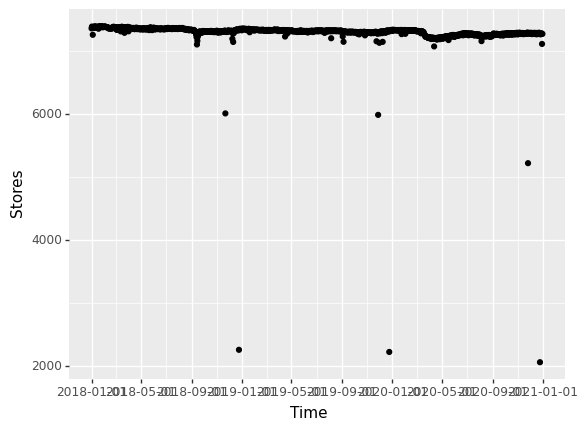

<ggplot: (8792982027246)>

In [38]:
(
    ggplot(mcd_agg_df, aes(x='Date', y='All_Stores Counted'))
    + geom_point()
    + labs(x='Time', y='Stores')
)

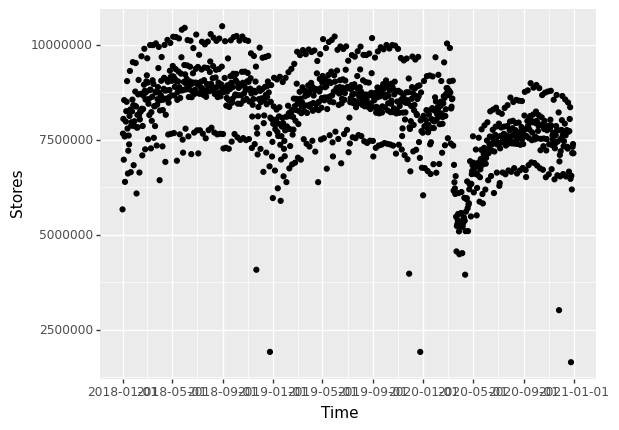

<ggplot: (8792980597408)>

In [39]:
(
    ggplot(mcd_agg_df, aes(x='Date', y='All_Guest Count'))
    + geom_point()
    + labs(x='Time', y='Stores')
)

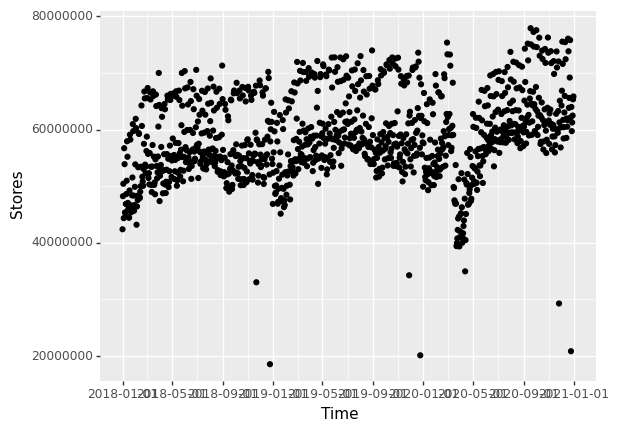

<ggplot: (8792980754595)>

In [40]:
(
    ggplot(mcd_agg_df, aes(x='Date', y='All_Total Sale Amount'))
    + geom_point()
    + labs(x='Time', y='Stores')
)

In [45]:
#run a regression on pre vs post covid

date_df = mcd_agg_df.set_index(mcd_agg_df['Date'])
#date_df = date_df[["Age", "Sex"]]
date_df = date_df.sort_index()
mcd_precovid_df = date_df['2018-01-01':'2020-03-17']
mcd_covid_df  = date_df['2020-03-18':]
print('PreCovid Dataset:',mcd_precovid_df.shape)
print('Covid Dataset:',mcd_covid_df.shape)

PreCovid Dataset: (807, 4)
Covid Dataset: (289, 4)


In [47]:
features = ['All_Guest Count','All_Stores Counted']
X = mcd_precovid_df.loc[:, features]
y = mcd_precovid_df.loc[:, ['All_Total Sale Amount']]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)


In [51]:
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

In [52]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [53]:
reg.predict(X_test[0:10])

array([68803419.45848486, 60655771.27995474, 60655771.27995474,
       54615269.19879746, 54615269.19879746, 68803419.45848486,
       60655771.27995474, 68803419.45848486, 54615269.19879746,
       54615269.19879746])

https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

https://builtin.com/data-science/time-series-python

https://www.wisdomgeek.com/development/machine-learning/sarima-forecast-seasonal-data-using-python/